In [2]:
import sys
from pathlib import Path
import os
# sys.path.append(str(Path(os.getcwd()).parent.absolute()))
os.chdir(str(Path(os.getcwd()).parent.absolute()))
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from src.metric.loss import symmetric_mean_absolute_percentage_error as smape

In [4]:
df_test=pd.read_csv('data/test.csv')
df_train=pd.read_csv('data/train.csv')
df_feature=pd.read_csv('data/census_starter.csv')

In [5]:
df_feature.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [6]:
set(df_feature.cfips).__len__()

3142

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


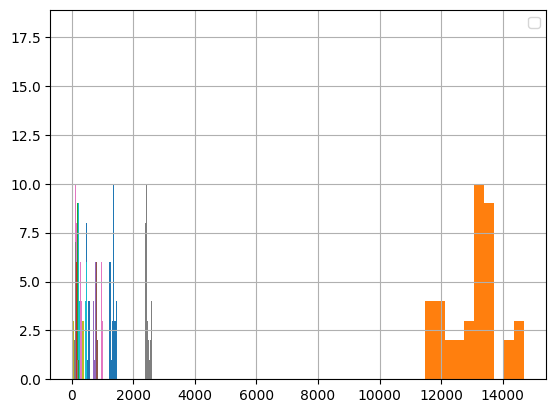

In [7]:
df_train.loc[lambda x:x.cfips<1040].sort_values(['cfips','first_day_of_month']).groupby(['cfips'])['active'].hist()
plt.legend()

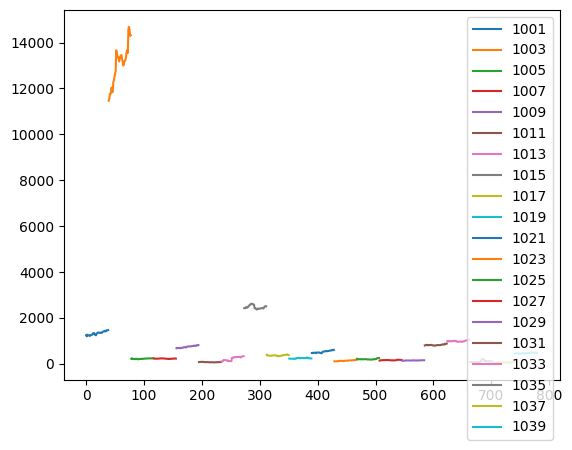

In [8]:
df_train.loc[lambda x:x.cfips<1040].sort_values(['cfips','first_day_of_month']).groupby(['cfips'])['active'].plot()
plt.legend()

In [9]:
set(df_train['cfips']).__len__()

3135

In [10]:
set(df_test.cfips).difference(set(df_train.cfips))

set()

In [11]:
all_state_codes=df_train[['cfips']].assign(fill=lambda x:x.cfips.apply(lambda x:'00'+str(x)))\
    .assign(state_code=lambda x:x.fill.apply(lambda x:x[len(x)-5:len(x)-3]))['state_code'].drop_duplicates().tolist(

    )

In [12]:
df_feature.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

In [100]:
print(df_train.first_day_of_month.max())
df_train.first_day_of_month.min()

2022-10-01


'2019-08-01'

In [23]:
df_code2state=pd.read_csv('data/code2state.csv',header=None)

In [36]:
df_code2state.assign(value=lambda x:x[0].apply(lambda x:x.strip()))\
    .assign(code=lambda x:x.value.apply(lambda x:x.split()[0]))\
    .assign(state=lambda x:x.value.apply(lambda x:' '.join(x.split()[1:])))[['code','state']]\
    .to_csv('data/code2state_clean.csv',index=False)
    

In [64]:
df_code2county=pd.read_csv('data/cifs.csv',header=None)

In [53]:
df_code2county.assign(value=lambda x:x[0].apply(lambda x:x.strip()))\
    .assign(code=lambda x:x.value.apply(lambda x:x.split()[0]))\
    .assign(county=lambda x:x.value.apply(lambda x:' '.join(x.split()[1:])))[['code','county']]\
    .to_csv('data/code2county_clean.csv',index=False)


Use

In [54]:
df_pop=pd.read_csv('data/population0410_07_19.csv')

In [67]:
df_code2county=pd.read_csv('data/code2county_clean.csv',converters={'code': str})

In [87]:
df_code2state=pd.read_csv('data/code2state_clean.csv',converters={'code': str})

In [89]:
df_code2state.head()

,code,state
0,01,ALABAMA
1,02,ALASKA
2,04,ARIZONA
3,05,ARKANSAS
4,06,CALIFORNIA


In [90]:
df_code2county.groupby('county').count().sort_values(by='code',ascending=False).head()

,code
county,
Washington County,30
Jefferson County,25
Franklin County,24
Jackson County,23
Lincoln County,23


In [91]:
df_code2county.loc[lambda x:x.county=='Washington County'].head()

,code,county
65,01129,Washington County
185,05143,Washington County
309,08121,Washington County
394,12133,Washington County
545,13303,Washington County


In [93]:
df_train.loc[lambda x:x.county=='Washington County']

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
2496,1129_2019-08-01,1129,Washington County,Alabama,2019-08-01,0.913030,118
2497,1129_2019-09-01,1129,Washington County,Alabama,2019-09-01,0.843392,109
2498,1129_2019-10-01,1129,Washington County,Alabama,2019-10-01,0.889817,115
2499,1129_2019-11-01,1129,Washington County,Alabama,2019-11-01,0.866605,112
2500,1129_2019-12-01,1129,Washington County,Alabama,2019-12-01,0.882080,114
...,...,...,...,...,...,...,...
121168,55131_2022-06-01,55131,Washington County,Wisconsin,2022-06-01,5.997713,6346
121169,55131_2022-07-01,55131,Washington County,Wisconsin,2022-07-01,6.032682,6383
121170,55131_2022-08-01,55131,Washington County,Wisconsin,2022-08-01,6.385211,6756
121171,55131_2022-09-01,55131,Washington County,Wisconsin,2022-09-01,6.399387,6771


In [95]:
df_train

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [96]:
df_feature

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [73]:
df_pop.assign(county=lambda x:x['Geographic Area Name (Grouping)'].apply(lambda x:x.split(',')[0]))\
    .assign(state=lambda x:x['Geographic Area Name (Grouping)'].apply(lambda x:x.split(',')[1]))\
    .merge(df_code2county,on=['county'],how='left')

,Geographic Area Name (Grouping),4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population,county,state,code
0,"Autauga County, Alabama","54,571","54,597","54,773","55,227","54,954","54,727","54,893","54,864","55,243","55,390","55,533","55,869",Autauga County,Alabama,01001
1,"Baldwin County, Alabama","182,265","182,265","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234",Baldwin County,Alabama,01003
2,"Baldwin County, Alabama","182,265","182,265","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234",Baldwin County,Alabama,13009
3,"Barbour County, Alabama","27,457","27,455","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686",Barbour County,Alabama,01005
4,"Barbour County, Alabama","27,457","27,455","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686",Barbour County,Alabama,54001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14606,"Vega Baja Municipio, Puerto Rico","59,662","59,662","59,562","58,688","57,857","57,063","55,942","54,805","53,677","52,318","50,136","50,023",Vega Baja Municipio,Puerto Rico,NaN
14607,"Vieques Municipio, Puerto Rico","9,301","9,301","9,314","9,247","9,227","9,179","9,081","8,965","8,833","8,666","8,362","8,386",Vieques Municipio,Puerto Rico,NaN
14608,"Villalba Municipio, Puerto Rico","26,073","26,073","26,001","25,542","25,135","24,745","24,256","23,662","23,091","22,452","21,436","21,372",Villalba Municipio,Puerto Rico,NaN
14609,"Yabucoa Municipio, Puerto Rico","37,941","37,941","37,874","37,361","36,844","36,377","35,732","35,076","34,363","33,519","32,254","32,282",Yabucoa Municipio,Puerto Rico,NaN


In [97]:
df_age=pd.read_csv('data/agegroup.csv')